In [16]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os, sys
import cv2

sys.path.append(os.path.join(os.path.dirname('.'), '../src'))
from PBT import PBTTuner



In [17]:
DATADIR = "PetImages/"
CATEGORIES = ["Dog", "Cat"]

IMG_SIZE = 100
training_data = []

for catergory in CATEGORIES:
    num_category = CATEGORIES.index(catergory)
    path = os.path.join(DATADIR, catergory)
    for image in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            training_data.append([img_arr, num_category])
        except Exception as e:
            pass

print(len(training_data))
random.shuffle(training_data)

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


24946


(24946, 100, 100, 1)


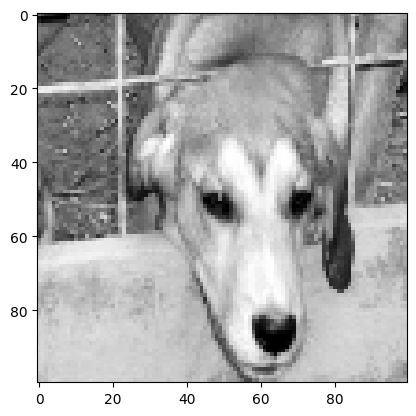

In [18]:
X, Y = [], []

for image, category in training_data:
    X.append(image)
    Y.append(category)

X = np.array(X).reshape(len(X), IMG_SIZE, IMG_SIZE, 1)
X = X.astype('float32')/255

print(X.shape)
plt.imshow(X[0], cmap="gray")

In [22]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [23]:
model = Sequential(
    [
        Input(shape=(100,100,1)),
        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)

Y = keras.utils.to_categorical(Y, num_classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.fit(X, Y, batch_size=32, epochs=3)

Epoch 1/3


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2, 2), output.shape=(None, 2)

In [21]:
InitialHP = np.random.normal(0.01, 0.000001, 5)
Optimizer = PBTTuner(model, 5, 2, 20, InitialHP, 'binary_crossentropy')
Optimizer.PBTOptimizeFit({'X':X, 'Y':Y}, X, Y, 100)

NameError: name 'keras' is not defined